# Text Representation: TF-IDF

### Importing Libraries

In [188]:
import pandas as pd
import numpy as np
import unicodedata

### Importing dataset and dropping excessive coloumns

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("news.csv")
# Drop the 'published_at' and 'topic' columns
df.drop(columns=['published_at', 'topic'], inplace=True)
df.head()

,title,content,source
0,BTS: RM is reminded of Bon Voyage as he travel...,"After reaching his hotel in the city, RM revea...",2
1,RM recalls wondering if he 'made right decisio...,RM aka Kim Namjoon was the first member to joi...,2
2,BTS: J-Hope and RM go bonkers at Billie Eilish...,"Billie Eilish's concert was held in Seoul, Sou...",1
3,"BTS: J-Hope proudly states he raised Jungkook,...",BTS ARMY y'all would be missing the members a ...,1
4,BTS: Jin aka Kim Seokjin takes us through the ...,BTS member Kim Seokjin aka Jin has the capacit...,1


### Checking the dimensions of your input variables and remove any rows with missing values or NaN values

In [190]:
# Load the data into a dataframe
df = pd.read_csv("news.csv")

# Check the dimensions of the dataframe
print(df.shape)

# Remove any rows with missing or NaN values
df = df.dropna()

# Check the dimensions of the dataframe again
print(df.shape)

# Check for duplication and remove them
df = df.drop_duplicates()

# Check the dimensions of the dataframe again
print(df.shape)


(810, 5)
(806, 5)
(806, 5)


### Using fillna() function to fill the missing values with mean, median or mode of the dataset.

In [191]:
df = df.fillna(df.mean()) # fill missing values with mean
df = df.fillna(df.median()) # fill missing values with median
df = df.fillna(df.mode().iloc[0]) # fill missing values with mode


C:\Users\Badman\AppData\Local\Temp\ipykernel_10304\1810546410.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean()) # fill missing values with mean
C:\Users\Badman\AppData\Local\Temp\ipykernel_10304\1810546410.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median()) # fill missing values with median


### Train Test Split
### Build a model with original text (no pre processing)


In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.content, 
    df.source, 
    test_size=0.1, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.source
)

### Chcking  shape of Train and Test

In [234]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (725,)
Shape of X_test:  (81,)


In [235]:
X_train.head()

440    BTS: Kim Seokjin aka Jin makes a promise, Jung...
315    BTS' V becomes fastest person to reach 40 mill...
227    BTS' V is back on social media after long brea...
21     Happy Birthday Jungkook: BTS' V wishes 'maknae...
111    BTS hint of world tour in 2022 with 'blinks', ...
Name: title, dtype: object

In [236]:
y_train.value_counts()

2    262
1    255
3    208
Name: source, dtype: int64

In [237]:
y_test.value_counts()

1    29
2    29
3    23
Name: source, dtype: int64

### Attempt 1 : using sklearn pipeline module create a classification pipeline to classify the News Data.

Note:

    use TF-IDF for pre-processing the text.

    use KNN as the classifier

    print the classification report.



In [238]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.69      0.73        29
           2       0.68      0.79      0.73        29
           3       0.76      0.70      0.73        23

    accuracy                           0.73        81
   macro avg       0.74      0.73      0.73        81
weighted avg       0.73      0.73      0.73        81



C:\Users\Badman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [239]:
X_test[:5]

458    BTS’ Jimin, BLACKPINK’s Lisa and more: Top 10 ...
674    BTS: Tejasswi Prakash is Bangtan Boys' fan, sh...
372    Watch: HallyuTalk REACTS to BTS’ J-Hope’s vira...
767    BTS: Jungkook drops vampire-ish picture; ARMY ...
355    BTS: Delhi Airport tweets lyrics of band's son...
Name: title, dtype: object

In [240]:
y_test[:5]

458    3
674    1
372    3
767    1
355    2
Name: source, dtype: int64

In [241]:
y_pred[:5]

array([3, 2, 2, 1, 2], dtype=int64)

### Attempt 2 :  using sklearn pipeline module create a classification pipeline to classify the News Data.

# Note:

    use TF-IDF for pre-processing the text.

    use MultinomialNB as the classifier.

    print the classification report.



In [242]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.83      0.77        29
           2       0.64      0.72      0.68        29
           3       0.80      0.52      0.63        23

    accuracy                           0.70        81
   macro avg       0.72      0.69      0.69        81
weighted avg       0.72      0.70      0.70        81



###  Attempt 3 : using sklearn pipeline module create a classification pipeline to classify the News Data.

# Note:

    use TF-IDF for pre-processing the text.

    use Random Forest as the classifier.

    print the classification report.



In [243]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.88      0.76      0.81        29
           2       0.68      0.86      0.76        29
           3       0.79      0.65      0.71        23

    accuracy                           0.77        81
   macro avg       0.78      0.76      0.76        81
weighted avg       0.78      0.77      0.77        81



### Use text pre-processing to remove stop words, punctuations and apply lemmatization 

In [244]:
def preprocess(text):
    removed_tokens = []
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            removed_tokens.append(token)
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens), removed_tokens




In [245]:
df['Original_Content'] = df['content']
df['New_Content'] = df['content'].apply(lambda x: preprocess(x)[0])
df['Removed_Words'] = df['content'].apply(lambda x: preprocess(x)[1])

In [246]:
df[['Original_Content', 'New_Content','Removed_Words']].head()

,Original_Content,New_Content,Removed_Words
0,"After reaching his hotel in the city, RM revea...",reach hotel city RM reveal stay day add step d...,"[After, his, in, the, ,, that, his, would, be,..."
1,RM aka Kim Namjoon was the first member to joi...,RM aka Kim Namjoon member join BTS group relea...,"[was, the, first, to, ., The, their, on, ,, .,..."
2,"Billie Eilish's concert was held in Seoul, Sou...",Billie Eilish concert hold Seoul South Korea a...,"['s, was, in, ,, and, it, was, by, ', and, -, ..."
3,BTS ARMY y'all would be missing the members a ...,BTS ARMY you miss member lot right BTS member ...,"[all, would, be, the, a, ,, ?, Well, ,, one, o..."
4,BTS member Kim Seokjin aka Jin has the capacit...,bts member Kim Seokjin aka Jin capacity create...,"[has, the, to, ., This, has, through, so, in, ..."


In [247]:
df.content[0]

'After reaching his hotel in the city, RM revealed that his stay would be for four days and added that he would step out for dinner. As he sat at a roadside open-air restaurant, RM feasted on beer, burgers and fries. He said, "I\'m starving right now. I\'m out to grab some food. It\'s much quieter than I expected and feels like a rural town. I like the familiar atmosphere." RM attended Art Basel and explained on camera the details of the art fair. He also gave a glimpse as he had noodles and beer which was followed by soup noodles and wrap. Showing the pattern of a ping pong table, RM said, "The table looks like our (BTS) symbol." He also spoke about the art pieces as he viewed them. After that, RM took a tram to visit the Foundation Beyeler, a museum. He later took a walk through the city. On his third day, RM visited the Kunstmuseum Basel, the Vitra Design Museum and the gallery. As he walked around, RM showed a chair to his fans and said, "I have breaking news for you guys. Coldplay

In [248]:
df.New_Content[0]

"reach hotel city RM reveal stay day add step dinner sit roadside open air restaurant RM feast beer burger fry say starve right grab food quieter expect feel like rural town like familiar atmosphere RM attend Art Basel explain camera detail art fair give glimpse noodle beer follow soup noodle wrap show pattern ping pong table RM say table look like BTS symbol speak art piece view RM take tram visit Foundation Beyeler museum later take walk city day RM visit Kunstmuseum Basel Vitra Design Museum gallery walk RM show chair fan say break news guy Coldplay Chris Martin chair display Vitra Design Museum Chris amazing RM visit Lucerne hike Mount Rigi recall previous visit Lucerne RM add remember day cross bridge buying souvenir remind Bon Voyage reality feature BTS member RM Jin Suga J Hope Jimin V Jungkook speak camera RM say ride SSB train Lucerne ride boat ride mountain train walk track road ride cable car boat plan ride SSB RM travel Switzerland end visit Museum Tinguely RM fly Paris att

### Build a model with pre processed text

In [249]:
X_train, X_test, y_train, y_test = train_test_split(
    df.New_Content, 
    df.content,
    test_size=0.10, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.source
)

### Let's check the scores with our best model till now

    Random Forest



In [253]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        29
           2       0.93      0.97      0.95        29
           3       1.00      0.87      0.93        23

    accuracy                           0.95        81
   macro avg       0.96      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81



**Comparing the classification report for the RandomForest model using preprocessed text to the one using unprocessed text, we can see an improvement in the F1 score. This suggests that preprocessing techniques such as removing stop words and lemmatization can improve the performance of the model for this specific problem.**

### Plot confusion matrix

In [254]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[29,  0,  0],
       [ 1, 28,  0],
       [ 1,  2, 20]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

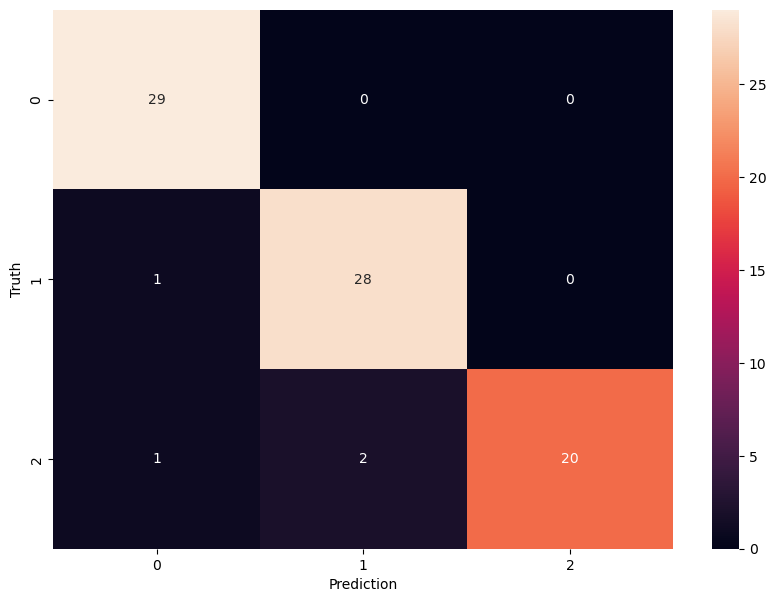

In [255]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')